## SARSA: On-Policy TD Control

In [1]:
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))

from gridworld import GridWorld,plot_value, plot_policy
import numpy as np

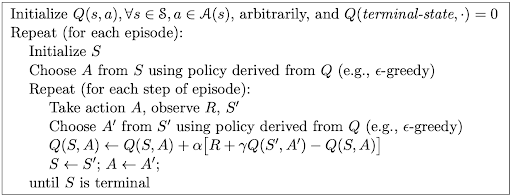

In [6]:
def get_epsilon_greedy_action(Q,state,epsilon):
    action_values = [v for k,v in Q.items() if k[0] == state]
    r = np.random.rand()
    if r <= epsilon:
        action = np.random.randint(4)
    else:
        action = np.argmax(action_values)
    return action

def SARSA(size,alpha,epsilon,gamma,iter_num):
    Q = {k:0 for k in [((i,j),a) for i in range(size) for j in range(size) for a in range(4)]}
    
    for _ in range(iter_num):

        env = GridWorld(size)
        done = False

        while not done:
            current_state = env.agent_position.copy()
            action = get_epsilon_greedy_action(Q,tuple(current_state),epsilon)
            next_state, reward, done, info = env.step(action)
            next_action = get_epsilon_greedy_action(Q,tuple(next_state),epsilon)
            next_Q = Q[(tuple(next_state),next_action)]
            
            update_term = reward + gamma*next_Q - Q[(tuple(current_state),action)]
            Q[(tuple(current_state),action)] = Q[(tuple(current_state),action)] + alpha*update_term
    
    #policy for plotting
    Pi = dict.fromkeys([(i,j) for i in range(size) for j in range(size) if i+j != 0 and i+j != (size-1)*2], [0.25]*4)# inital actions as UP
    for state in Pi.keys():
        action_values = [v for k,v in Q.items() if k[0] == state]
        best_action = np.argmax(action_values)
        Pi[state] = [1 if i == best_action else 0 for i in range(4)] 
    
    return Q,Pi

In [17]:
size = 4
Q,Pi = SARSA(size,0.1,0.3,0.5,1000)

In [18]:
plot_policy(Pi,size)

X	|←	|←	|↓	|
↑	|↑	|↓	|↓	|
↑	|↓	|↓	|↓	|
→	|→	|→	|X	|
 
